#### CMSE 201 Final Project
### &#9989; Adam Dion
### &#9989; Section_004
#### &#9989; 4/10/2020

# ___Optimizing Blackjack___

## Background and Motivation

For my project I modeled the very popular casion game black jack. I followed common blackjack strategy when a dealer stands on a soft 17(the rules I used are shown below).

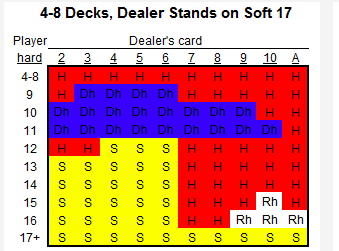

# Their are multiple goals of this project:
1. What are the chances a player has to win a single hand in blackjack(using law of large numbers).
 - Their are multiple answers to this online so I want to find the answer myself. Some results I have found are: 

 - From https://wizardofodds.com/games/blackjack/variance/ they give the results of 
    * 42.43% win 
    * 8.48% push(tie)
    * 49.09% loss
 - From https://www.777.com/casino-games/blackjack/statistics.htm they give the result of 
    * 48% win 
 - From https://www.888casino.com/blog/top-8-reasons-why-most-blackjack-players-lose they give the result of
    * 48% excluding ties
    * So, What is odds of truly winning one hand???
2. Model a real game where a player can see how much money they will win based on an initial amount they start with while having a constant bet.
3. Come up with a solution to limit risk for the amount of money you lose

## Methodology

In [1]:
#This cell just imports all of the libraries I used 
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
#This cell has the deck that im using and is used a lot in later cells
def initalize_deck():
    deck = [2,3,4,5,6,7,8,9,10,10,10,10,11]    
    return deck

In [3]:
#This cell gives the player and dealer two cards
def dealing(deck):
    #two blank lists that will be filled with two cards to complete their hand
    player = []
    dealer = []
    
    #randomly picks a value from the deck and puts it in the players hand
    player.append(np.random.choice(deck)) 
    player.append(np.random.choice(deck))
    dealer.append(np.random.choice(deck))
    dealer.append(np.random.choice(deck))
    
    #returns both the players and dealers hand
    return player, dealer

In [4]:
#In blackjack if you have an ace you can play it as a 11 or as a 1.
#This cell checks to see if the player has an ace and decides if it should use it as an 11 or a 1.
def ace_play(player):
    players_hand = sum(player)
    if player[0] == 11 or player[1] == 11:
        if players_hand < 17 and players_hand > 13:
            return True
        else:
            return False
    else: 
        return False  

In [5]:
#This cell takes the players hand and first checks to see if it has an ace that is using the 11.
#If the hand is using the 11 and busts then it will return true and later on it will change the 11 to a 1.
def bust_bc_ace(player):
    players_hand = sum(player)
    
    if players_hand >= 22:
        if player[0] == 11 or player[1] == 11:
            return True
        else:
            return False
    else:
        return False

In [6]:
#This cell takes the dealers hand and first checks to see if it has an ace that is using the 11.
#If the hand is using the 11 and busts then it will return true and later on it will change the 11 to a 1.
def bust_bc_ace_dealer(dealer):
    dealers_hand = sum(dealer)

    if dealers_hand >= 22:
        if dealer[0] == 11 or dealer[1] == 11:
            return True
        else:
            return False
    else:
        return False

In [7]:
#This cell contains all of the optimal plays for the player to make
def players_play(player,dealer):
    #takes the sum of the players hand bc we only care about the numbers added together
    players_hand = sum(player)
    #looks at the dealers first card because it will be faced up
    dealers_first_card = dealer[0]
    i = 1
    double = False
    #while loop that goes until the player has finished its move
    while i < 6:
        #All of the players options, it breaks the loop when thats the hadn the player will use to go against the dealers hadn
        
        if players_hand >= 17:
            players_hand = players_hand
            break
        if ace_play(player) == True:
            players_hand = players_hand + (np.random.choice(deck))

        if players_hand == 11:
            double = True
            players_hand = players_hand + (np.random.choice(deck))
            break
        if players_hand == 10 and dealers_first_card <= 9:
            double = True
            players_hand = players_hand + (np.random.choice(deck))
            break
        if players_hand == 10 and dealers_first_card > 9:
            players_hand = players_hand + (np.random.choice(deck))

        if players_hand == 9 and dealers_first_card <= 6:
            double = True
            players_hand = players_hand + (np.random.choice(deck))
            break
            
        if players_hand == 9 and dealers_first_card > 6:
            players_hand = players_hand + (np.random.choice(deck))
        
        if players_hand <= 8:
            players_hand = players_hand + (np.random.choice(deck))

        if players_hand == 12 and dealers_first_card >= 7 or dealers_first_card <= 3:
            players_hand = players_hand + (np.random.choice(deck))
            
        if players_hand == 12 and dealers_first_card >= 4 or dealers_first_card <= 6:
            players_hand = players_hand

        if dealers_first_card > 6 and players_hand >= 13 and players_hand <= 16:
            players_hand = players_hand + (np.random.choice(deck))
            
        if dealers_first_card <= 6 and players_hand >= 13 and players_hand <= 16:
            players_hand = players_hand 
            break
        
        if bust_bc_ace(player) == True:
            players_hand = players_hand - 10
       
        
        i += 1   
            
    # Lets me know if the player busts or not
    if players_hand > 21:      
        p_playable = False  
        
    if players_hand <= 21:
        p_playable = True
    return p_playable, double, players_hand

In [8]:
#All of the options the dealer can make
def dealers_play(dealer):
    dealers_hand = sum(dealer)
    d_playable = None
            
    if dealers_hand <= 21 and dealers_hand >= 17:
        d_playable = True 
        dealers_hand = dealers_hand
          
    while dealers_hand <= 16:
    
        if dealers_hand <= 16:
            dealers_hand = dealers_hand + (np.random.choice(deck))
            if bust_bc_ace_dealer(dealer) == True:
                dealers_hand = dealers_hand - 10
            if dealers_hand <= 21 and dealers_hand >= 17:
                d_playable = True 
            else:
                d_playable = False
                
    return d_playable, dealers_hand

In [9]:
#returns if the player won, loss, or tied
def winner(p_playable,d_playable,players_hand,dealers_hand):   
    #If it returns true then the player won
    result = None
    if p_playable == False: #if the player bust they lose
        result = 'loss'
    if d_playable == False and p_playable == True: #if the dealer busts and the player doesnt player wins
        result='win'
    if p_playable == True and d_playable == True: #if they both didnt bust it compares hands
        if players_hand == dealers_hand:
            result='tie'
        elif players_hand > dealers_hand:
            result='win'
        elif players_hand < dealers_hand:
            result='loss'
                             
    return result                  

In [10]:
#this cell deals with the pay out of money for every hand
def money(result,double,gamble,bet):
    if double == False:
        if result=='win':
            gamble = gamble + bet 
        if result == 'loss':
            gamble = gamble - bet 
        if result == 'tie':
            gamble = gamble

    if double == True:
        if result == 'win':
            gamble = gamble + (bet * 2) 
        if result == 'loss':
            gamble = gamble - (bet * 2)
        if result == 'tie':
            gamble = gamble
                
    return gamble

In [11]:
#this function takes betting into a more complex matter with proggressive betting
#this works by betting more if you win to play with your winnings and bet less if you lose so you dont go bankrupt
def proggressive_betting(result,bet):
    if bet >= 5 * bet:
        bet = bet
    elif bet <= 5 / bet:
        bet = bet
        if result == 'win':
            bet = bet * 1.5
        elif result == 'loss':
            bet = bet / 2
        else:
            bet = bet
    
    return bet

## Results

In [12]:
## win counter 
hands_played = 10000
i = 1
win_count = []
loss_count = []
tie_count = []
while i < hands_played:
    #initalize board and hands

    deck = initalize_deck()
    hands = dealing(deck)
    player = hands[0]
    dealer = hands[1]
    
    #each players options based off their hand
    d_playable,dealers_hand = dealers_play(dealer)
    
    p_playable,double,players_hand = players_play(player,dealer)
    #finds out who wins
    result = winner(p_playable,d_playable,players_hand,dealers_hand)
    #counts the number of wins
    if result == 'win':
        win_count.append(i)
    if result == 'loss':
        loss_count.append(i)
    if result == 'tie':
        tie_count.append(i)
            
    i += 1
    
total_wins = len(win_count)
win_per = total_wins / hands_played
total_losses = len(loss_count)
loss_per = total_losses / hands_played
total_ties = len(tie_count)
tie_per = total_ties / hands_played

print('Total wins:  ', total_wins, '   Win Percent: ', win_per)
print('Total losses:',total_losses, '   Loss Percent: ', loss_per)
print('Total ties:  ', total_ties, '    Tie Percent: ', tie_per)

Total wins:   4151    Win Percent:  0.4151
Total losses: 4955    Loss Percent:  0.4955
Total ties:   863     Tie Percent:  0.0863


How many hands do you wanna play?50
How much money do you want to start off with?20
How much do you wanna bet every hand?1
You are now at 5 dollars


Text(0.5, 1.0, 'Game of blackjack normal strategy')

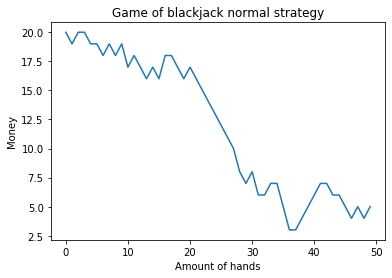

In [13]:
#Main Function To play

#Ask user how they wanna play
hands = int(input('How many hands do you wanna play?'))
gamble = int(input('How much money do you want to start off with?'))
bet = int(input('How much do you wanna bet every hand?'))

x = hands
i = 1
tracker = []
tracker.append(gamble)
while i < x:
    #initalize board and hands
    if gamble <= 0:
        break
    deck = initalize_deck()
    hands = dealing(deck)
    player = hands[0]
    dealer = hands[1]
    
    #each players options based off their hand
    d_playable,dealers_hand = dealers_play(dealer)

    p_playable,double,players_hand = players_play(player,dealer)
    #finds out who wins
    result = winner(p_playable,d_playable,players_hand,dealers_hand)
    #deals with money
    gamble = money(result,double,gamble,bet)
    tracker.append(gamble)
    i += 1
if gamble <= 0:
    print('You are out of money')
if gamble > 0:
    print('You are now at', gamble, 'dollars')
    
plt.figure(1)
plt.plot(tracker)
plt.xlabel("Amount of hands")
plt.ylabel("Money")
plt.title("Game of blackjack normal strategy")

How many hands do you wanna play?500
How much money do you want to start off with?20
How much do you wanna bet every hand?1
You are now at 17.252423081154678 dollars
6.767357609547206e-42


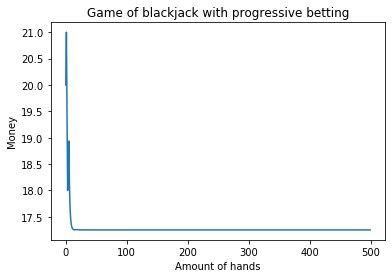

In [14]:
# Main Function To play

#Ask user how they wanna play
hands = int(input('How many hands do you wanna play?'))
gamble = int(input('How much money do you want to start off with?'))
bet = int(input('How much do you wanna bet every hand?'))

x = hands
i = 1
tracker = []
tracker.append(gamble)
while i < x:
    #initalize board and hands
    if gamble <= 0:
        break
    deck = initalize_deck()
    hands = dealing(deck)
    player = hands[0]
    dealer = hands[1]
    
    #each players options based off their hand
    d_playable,dealers_hand = dealers_play(dealer)
    p_playable,double,players_hand = players_play(player,dealer)
    #finds out who wins
    result = winner(p_playable,d_playable,players_hand,dealers_hand)
    #deals with money
    gamble = money(result,double,gamble,bet)
    #adds in proggressive betting
    bet = proggressive_betting(result,bet)
    tracker.append(gamble)
    i += 1
if gamble <= 0:
    print('You are out of money')
if gamble > 0:
    print('You are now at', gamble, 'dollars')
plt.plot(tracker)
plt.xlabel("Amount of hands")
plt.ylabel("Money")
plt.title("Game of blackjack with progressive betting")
print(bet)

## Discussion and Conclustion

1. What did you learn?

>From this experiment I learned the dealer will always have the better odds of winning in black jack but their are ways to help minimize your losses.

2. What obstacles did you run into?

>It took me a while to make sure the player was always doing the most optimal move and having that in the correct order. After figuring that out it took me a while to figure out a strategy to minimize losses while betting.

3. what would you do differently?

>I wouldn't change alot because im very happy with how this came out. The only thing I would change would be to have a cooler way to show my results.

4. clearly provide quantitave answers to your questions?

>The odds to win a single blackjack hand using basic strategy and law of large numbers is: 

>41.8% win 49.2% lose 9% tie

>When betting normaly it is very rare to profit money and if you play enough hands you almost always go bankrupt.

>With progressive betting it's clear to see that it minimizes losses while helping increase profit.


### References

These are the sources of the data that is up above in the goals of the project section

1. Shackleford, Michael. “Variance in Blackjack.” Wizard Of Odds, Your Guide to Gambling and Online Casinos, News, Wizard of Odds, 21 Jan. 2019, wizardofodds.com/games/blackjack/variance/.

2. “Blackjack Statistics at 777.” 777, 30 July 2015, www.777.com/casino-games/blackjack/statistics.htm.

3. Ph.D, Henry Tamburin. “Top 8 Reasons Why Most Blackjack Players Lose.” Online Casino, 888, 29 June 2017, www.888casino.com/blog/top-8-reasons-why-most-blackjack-players-lose.

Where I found the progessive betting stategy 

1. Metro. “5 Tips for Basic Blackjack Money Management.” Metro US, 27 Feb. 2020, www.metro.us/5-tips-for-basic-blackjack-money-management/.